<div style="text-align:center; margin:40px 0;">
  <div style="
      display:inline-block;
      font-size:36px;
      font-weight:bold;
      color:#ffffff;
      background: linear-gradient(135deg, #1e3c72, #2a5298);
      padding:25px 80px;
      clip-path: polygon(0 0, 95% 0, 100% 50%, 95% 100%, 0% 100%);
      box-shadow: 0 8px 20px rgba(0,0,0,0.3);
      letter-spacing: 1px;
  ">
      Customer Churn Project
  </div>
</div>


In [292]:
# 1. to handle the data
import pandas as pd
import numpy as np
# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold,StratifiedKFold
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor,VotingClassifier

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
# In addition to your existing imports, add these:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.decomposition import PCA
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<div style="text-align:left; margin:20px 0;">
  <div style="
      display:inline-block;
      font-size:20px;
      font-weight:bold;
      color:#ffffff;
      background: linear-gradient(135deg, #8e44ad, #9b59b6);
      padding:12px 30px;
      clip-path: polygon(0 0, 92% 0, 100% 50%, 92% 100%, 0% 100%);
      box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  ">
      Read Data
  </div>
</div>


In [293]:
df=pd.read_csv('D:\AI- SU25\Re-Project 1\Telco-Customer-Churn.csv')

In [294]:
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!-- EDA -->
<div style="text-align:left; margin:20px 0;">
  <div style="
      display:inline-block;
      font-size:20px;
      font-weight:bold;
      color:#ffffff;
      background: linear-gradient(135deg, #16a085, #1abc9c);
      padding:12px 30px;
      clip-path: polygon(0 0, 92% 0, 100% 50%, 92% 100%, 0% 100%);
      box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  ">
      EDA
  </div>
</div>

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [296]:
# convert datatype for 'TotalCharges'
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [297]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [298]:
# drop missing values
df.dropna(inplace=True)

# drop customerID 
df.drop('customerID', axis=1, inplace=True)

In [299]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [300]:
# summary dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


## Check Unique Values :)


In [301]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<Axes: >

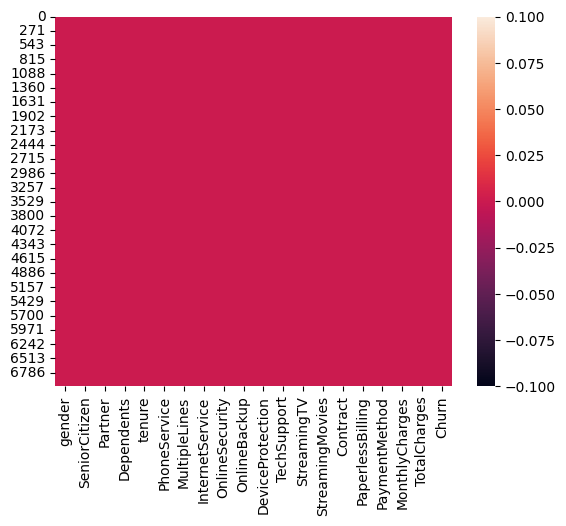

In [302]:
# heatmap for missing value
sns.heatmap(df.isnull())

## Visualization :)


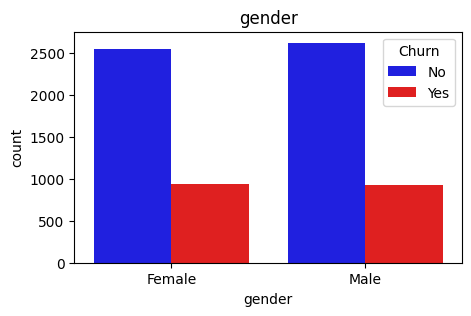

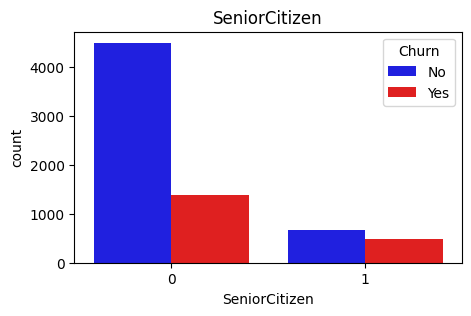

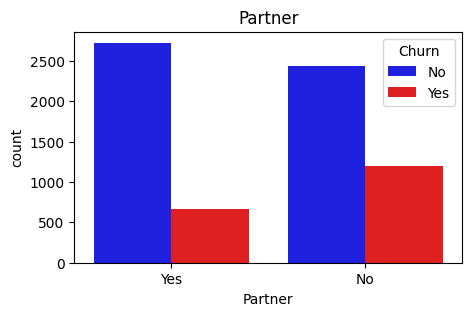

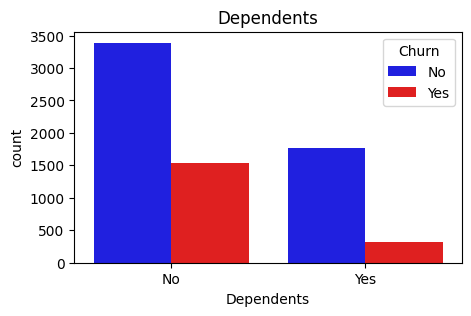

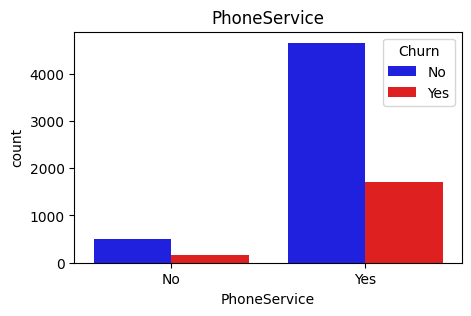

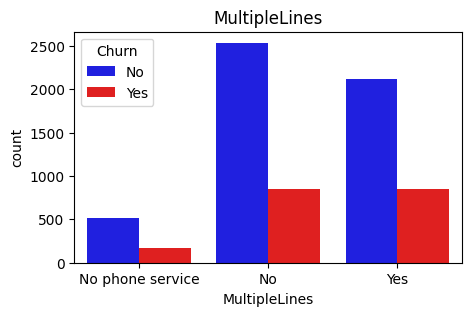

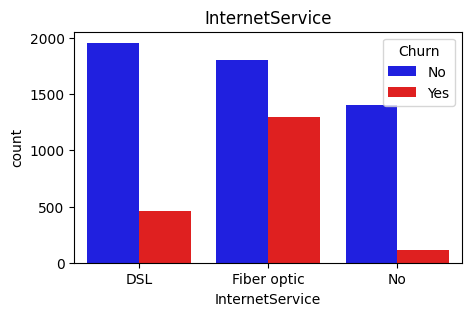

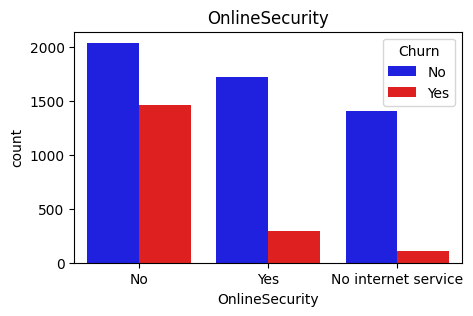

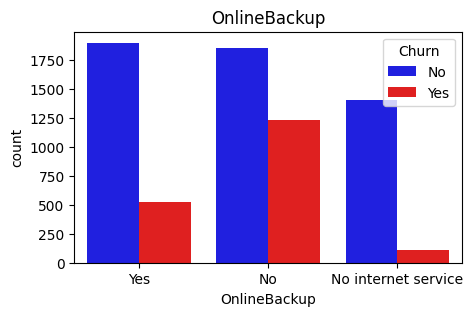

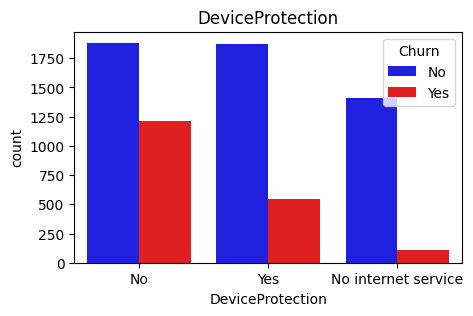

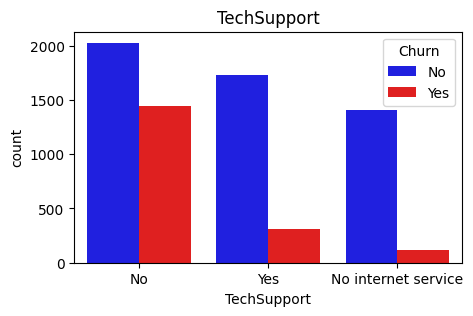

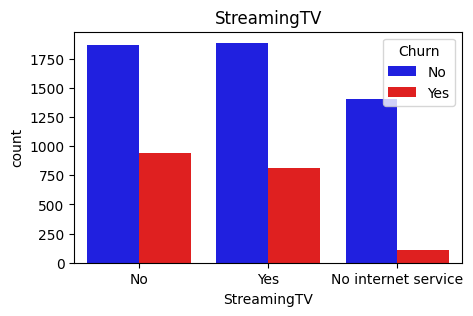

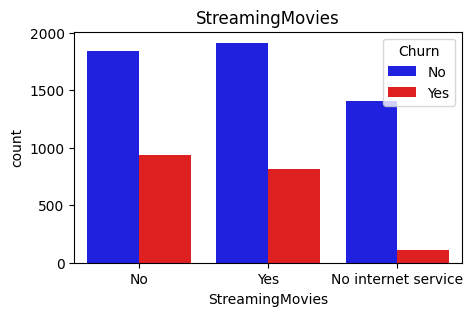

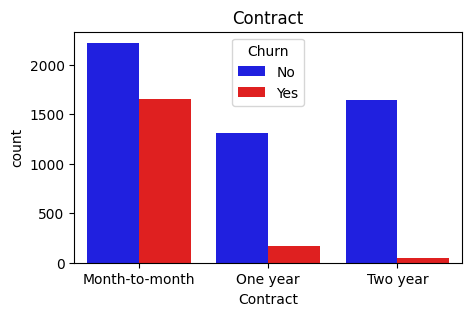

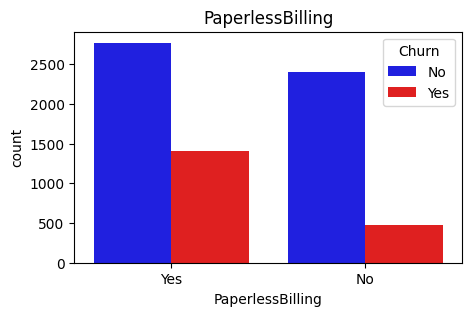

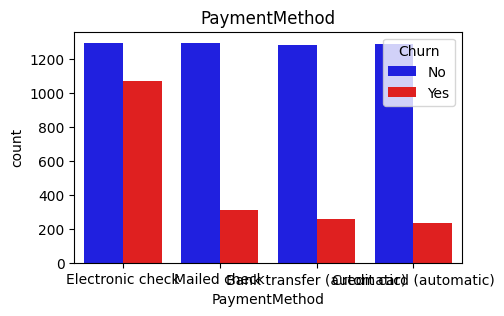

In [303]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

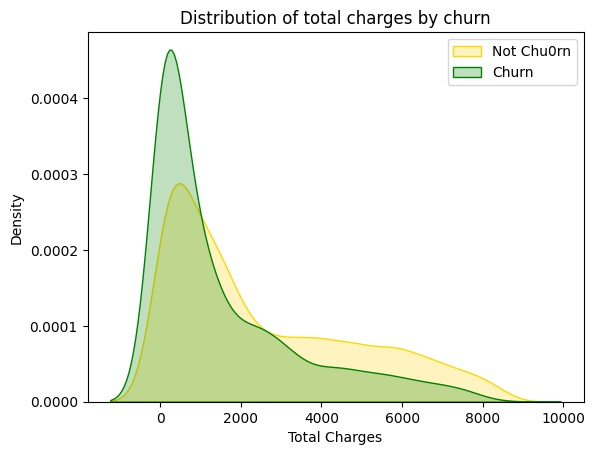

In [304]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

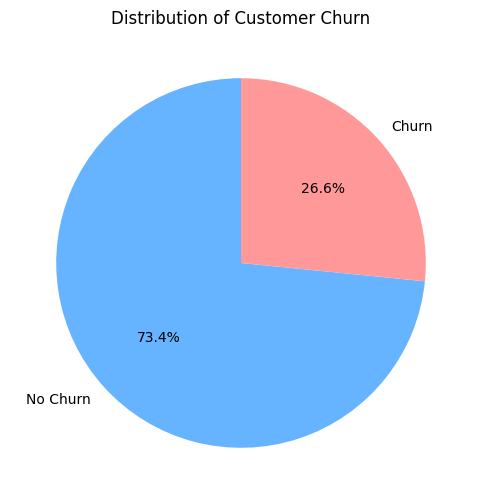

In [305]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Customer Churn')
plt.show()

<!-- Model Training -->
<div style="text-align:left; margin:20px 0;">
  <div style="
      display:inline-block;
      font-size:20px;
      font-weight:bold;
      color:#ffffff;
      background: linear-gradient(135deg, #34495e, #2c3e50);
      padding:12px 30px;
      clip-path: polygon(0 0, 92% 0, 100% 50%, 92% 100%, 0% 100%);
      box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  ">
      Model Training
  </div>
</div>

In [306]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [307]:
df.drop('Churn_No', axis=1, inplace=True)


In [308]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (after encoding)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [309]:
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,3.056334,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,1.005419,-0.52513,-0.633746,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,-0.601663
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576,-0.601663
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576,1.662059
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,3.056334,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,-0.987563,-0.52513,1.564308,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604,-0.601663
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,-0.723462,1.127527,-0.52513,1.005419,-0.52513,-0.633746,1.130460,-0.52513,-0.725516,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,1.662059


In [310]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [311]:
df['Churn'] = df['Churn'].replace({"No": 0, "Yes": 1, "no": 0, "yes": 1})
df['Churn'] = df['Churn'].astype(int)

In [312]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5625, 45), (5625,), (1407, 45), (1407,))

In [313]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [314]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled=scaler.transform(X_test)

In [315]:
from sklearn.decomposition import PCA

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("After PCA:", X_train_pca.shape)


Original shape: (5047, 45)
After PCA: (5047, 18)


In [316]:
print(X_train_scaled.shape, y_train_res.shape, X_test_scaled.shape, y_test.shape)

(5047, 45) (5047,) (1407, 45) (1407,)


<!-- Model Evaluation -->
<div style="text-align:left; margin:20px 0;">
  <div style="
      display:inline-block;
      font-size:20px;
      font-weight:bold;
      color:#ffffff;
      background: linear-gradient(135deg, #e91e63, #ff4081);
      padding:12px 30px;
      clip-path: polygon(0 0, 92% 0, 100% 50%, 92% 100%, 0% 100%);
      box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  ">
      Model Evaluation
  </div>
</div>


In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with balanced weights
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_res)

# Predict probabilities for threshold tuning
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Try different thresholds to maximize recall
best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Best threshold = 0.10, Recall = 0.9599
              precision    recall  f1-score   support

           0     0.9681    0.4405    0.6055      1033
           1     0.3831    0.9599    0.5477       374

    accuracy                         0.5785      1407
   macro avg     0.6756    0.7002    0.5766      1407
weighted avg     0.8126    0.5785    0.5901      1407



In [318]:
knn_params = {
    "n_neighbors": [3, 5, 7, 11, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # Manhattan / Euclidean
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_params,
    scoring="recall",
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train_scaled, y_train_res)

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("✅ KNN best params:", knn_grid.best_params_)
print("🔍 KNN Recall:", recall_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, digits=4))


✅ KNN best params: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
🔍 KNN Recall: 0.8556149732620321
              precision    recall  f1-score   support

           0     0.9194    0.5963    0.7234      1033
           1     0.4342    0.8556    0.5761       374

    accuracy                         0.6652      1407
   macro avg     0.6768    0.7260    0.6497      1407
weighted avg     0.7904    0.6652    0.6843      1407



In [319]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train_res)

y_pred_proba = svm_clf.predict_proba(X_test_scaled)[:,1]

# Threshold tuning for recall
best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Best threshold = 0.10, Recall = 0.9064
              precision    recall  f1-score   support

           0     0.9420    0.5499    0.6944      1033
           1     0.4216    0.9064    0.5756       374

    accuracy                         0.6446      1407
   macro avg     0.6818    0.7281    0.6350      1407
weighted avg     0.8036    0.6446    0.6628      1407



In [320]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train_res)

y_pred_proba = nb.predict_proba(X_test_scaled)[:,1]

# Threshold tuning for recall
best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Best threshold = 0.10, Recall = 0.8556
              precision    recall  f1-score   support

           0     0.9168    0.5760    0.7075      1033
           1     0.4222    0.8556    0.5654       374

    accuracy                         0.6503      1407
   macro avg     0.6695    0.7158    0.6364      1407
weighted avg     0.7853    0.6503    0.6697      1407



In [321]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_scaled, y_train_res)

y_pred_proba = dt.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Decision Tree → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))




Decision Tree → Best threshold = 0.10, Recall = 0.7433
              precision    recall  f1-score   support

           0     0.8845    0.7115    0.7886      1033
           1     0.4826    0.7433    0.5853       374

    accuracy                         0.7200      1407
   macro avg     0.6836    0.7274    0.6869      1407
weighted avg     0.7777    0.7200    0.7346      1407



In [322]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train_res)

y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Random Forest → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Random Forest → Best threshold = 0.10, Recall = 0.9465
              precision    recall  f1-score   support

           0     0.9606    0.4724    0.6334      1033
           1     0.3938    0.9465    0.5562       374

    accuracy                         0.5984      1407
   macro avg     0.6772    0.7095    0.5948      1407
weighted avg     0.8100    0.5984    0.6128      1407



In [323]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=200,
    random_state=42
)
bag.fit(X_train_scaled, y_train_res)

y_pred_proba = bag.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Bagging → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Bagging → Best threshold = 0.10, Recall = 0.9225
              precision    recall  f1-score   support

           0     0.9493    0.5257    0.6766      1033
           1     0.4132    0.9225    0.5707       374

    accuracy                         0.6311      1407
   macro avg     0.6812    0.7241    0.6237      1407
weighted avg     0.8068    0.6311    0.6485      1407



In [324]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, class_weight="balanced"),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train_scaled, y_train_res)

y_pred_proba = ada.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"AdaBoost → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


AdaBoost → Best threshold = 0.10, Recall = 1.0000
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1033
           1     0.2658    1.0000    0.4200       374

    accuracy                         0.2658      1407
   macro avg     0.1329    0.5000    0.2100      1407
weighted avg     0.0707    0.2658    0.1116      1407



In [325]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=3, # helps recall
    random_state=42
)
xgb.fit(X_train_scaled, y_train_res)

y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"XGBoost → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


XGBoost → Best threshold = 0.10, Recall = 0.8636
              precision    recall  f1-score   support

           0     0.9258    0.6157    0.7395      1033
           1     0.4486    0.8636    0.5905       374

    accuracy                         0.6816      1407
   macro avg     0.6872    0.7397    0.6650      1407
weighted avg     0.7989    0.6816    0.6999      1407



In [326]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(class_weight='balanced', random_state=42)
lgb.fit(X_train_scaled, y_train_res)

y_pred_proba = lgb.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"LightGBM → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


[LightGBM] [Info] Number of positive: 2808, number of negative: 2239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2782
[LightGBM] [Info] Number of data points in the train set: 5047, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM → Best threshold = 0.10, Recall = 0.8824
              precision    recall  f1-score   support

           0     0.9338    0.6012    0.7314      1033
           1     0.4447    0.8824    0.5914       374

    accuracy                         0.6759      1407
   macro avg     0.6893    0.7418    0.6614      1407
weighted avg     0.8038    0.6759    0.6942      1407



In [327]:
# from sklearn.ensemble import VotingClassifier

# voting = VotingClassifier(
#     estimators=[
#         ('lr', log_reg),
#         ('rf', rf),
#         ('xgb', xgb)
#     ],
#     voting='soft'
# )
# voting.fit(X_train_scaled, y_train_res)

# y_pred_proba = voting.predict_proba(X_test_scaled)[:,1]

# best_thr, best_rec, best_pred = 0.5, 0, None
# for thr in np.arange(0.1, 0.91, 0.05):
#     y_pred_thr = (y_pred_proba >= thr).astype(int)
#     rec = recall_score(y_test, y_pred_thr)
#     if rec > best_rec:
#         best_rec, best_thr, best_pred = rec, thr, y_pred_thr

# print(f"Voting → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
# print(classification_report(y_test, best_pred, digits=4))
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
ada.fit(X_train_scaled, y_train_res)
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),        # ✅ use rf instead of rf_best
        ('ada', ada), 
        ('logreg', log_reg)   # also careful: you wrote "lo_reg", should be "log_reg"
    ],
    voting='soft'  
)

# Train the model on SMOTE + scaled data
voting_clf.fit(X_train_scaled, y_train_res)

# Predict probabilities
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Threshold tuning 
best_threshold = 0.5
best_recall = 0
for thr in np.arange(0.5, 0.09, -0.01):
    y_pred_thr = (y_probs >= thr).astype(int)
    recall = recall_score(y_test, y_pred_thr)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thr

print(f"\n=== Voting Classifier ===")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Recall (Test): {best_recall:.4f}")

# Final evaluation at the best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))



=== Voting Classifier ===
Best Threshold: 0.10
Best Recall (Test): 0.9679

Final Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.37      0.54      1033
           1       0.36      0.97      0.52       374

    accuracy                           0.53      1407
   macro avg       0.66      0.67      0.53      1407
weighted avg       0.81      0.53      0.54      1407



In [328]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    passthrough=True
)
stack.fit(X_train_scaled, y_train_res)

y_pred_proba = stack.predict_proba(X_test_scaled)[:,1]

best_thr, best_rec, best_pred = 0.5, 0, None
for thr in np.arange(0.1, 0.91, 0.05):
    y_pred_thr = (y_pred_proba >= thr).astype(int)
    rec = recall_score(y_test, y_pred_thr)
    if rec > best_rec:
        best_rec, best_thr, best_pred = rec, thr, y_pred_thr

print(f"Stacking → Best threshold = {best_thr:.2f}, Recall = {best_rec:.4f}")
print(classification_report(y_test, best_pred, digits=4))


Stacking → Best threshold = 0.10, Recall = 0.8476
              precision    recall  f1-score   support

           0     0.9204    0.6379    0.7536      1033
           1     0.4588    0.8476    0.5953       374

    accuracy                         0.6937      1407
   macro avg     0.6896    0.7428    0.6744      1407
weighted avg     0.7977    0.6937    0.7115      1407



In [329]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store model results
results = {}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Train model, tune threshold for recall, and save metrics"""
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    best_thr, best_rec, best_pred = 0.5, 0, None
    for thr in np.arange(0.1, 0.91, 0.05):
        y_pred_thr = (y_pred_proba >= thr).astype(int)
        rec = recall_score(y_test, y_pred_thr)
        if rec > best_rec:
            best_rec, best_thr, best_pred = rec, thr, y_pred_thr

    acc = accuracy_score(y_test, best_pred)
    prec = precision_score(y_test, best_pred)
    rec = recall_score(y_test, best_pred)
    f1 = f1_score(y_test, best_pred)

    results[name] = {
        "Best_Threshold": best_thr,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }

# List of models you trained
models = {
    "LogReg": log_reg,
    "KNN": knn_grid,
    "SVM": svm_clf,
    "NaiveBayes": nb,
    "DecisionTree": dt,
    "RandomForest": rf,
    "Bagging": bag,
    "XGBoost": xgb,
    "LightGBM": lgb,
    "Voting": voting_clf,
    "Stacking": stack
}

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, y_train_res, X_test_scaled, y_test)

# Create DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Recall", ascending=False)

print("📊 Results Summary:")
print(results_df)

# Best models
best_recall_model = results_df["Recall"].idxmax()
best_accuracy_model = results_df["Accuracy"].idxmax()

print(f"\n🔝 Best Recall: {best_recall_model} ({results_df.loc[best_recall_model, 'Recall']:.4f})")
print(f"🔝 Best Accuracy: {best_accuracy_model} ({results_df.loc[best_accuracy_model, 'Accuracy']:.4f})")


[LightGBM] [Info] Number of positive: 2808, number of negative: 2239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2782
[LightGBM] [Info] Number of data points in the train set: 5047, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
📊 Results Summary:
              Best_Threshold  Accuracy  Precision    Recall        F1
Voting                   0.1  0.531628   0.358771  0.967914  0.523500
LogReg                   0.1  0.578536   0.383138  0.959893  0.547674
RandomForest             0.1  0.598436   0.393771  0.946524  0.556167
Bagging                  0.1  0.631130   0.413174  0.922460  0.570720
SVM                      0.1  0.644634   0.421642  0.906417  0.575552
KNN                      0.1  0.620469   0.403846  0.898396  0.557214
Li

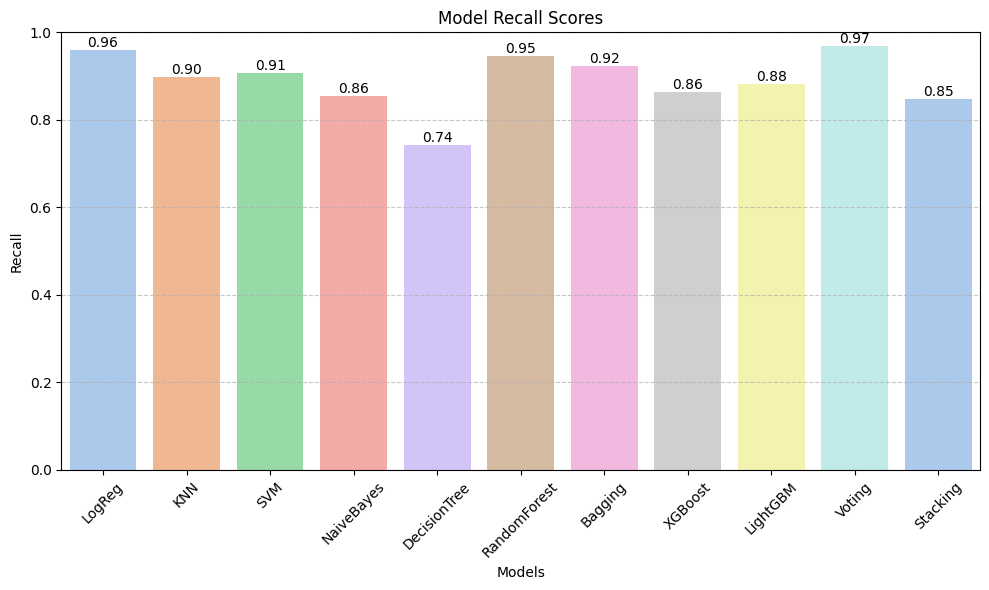

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so "Model" becomes a column for plotting
plot_df = results_df.reset_index().rename(columns={"index": "Model"})

plot_df["Model"] = pd.Categorical(plot_df["Model"], categories=models.keys(), ordered=True)
plot_df = plot_df.sort_values("Model")
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(plot_df))

# Create a bar plot of Recall
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Recall', data=plot_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # recall is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Project/
├── app.py
└── Model/
    ├── telco_churn_voting_model.pkl
    ├── telco_churn_scaler.pkl
    └── telco_churn_processing.pkl
